In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
df = pd.read_csv('/content/tumors.csv')

In [3]:
# Sample of the Dataset
df.head()
df = df.sample(frac=1).reset_index(drop=True) # shuffle
df.head()

,leukocyte_count,blood_pressure,tumor_class
0,13.327364,15.841328,malignant
1,15.611908,15.267433,malignant
2,13.415888,15.045303,malignant
3,10.538796,15.127259,malignant
4,14.176326,14.655906,malignant


In [4]:
# Split the Target variable
X = df[['leukocyte_count','blood_pressure']].values
y = df['tumor_class'].values

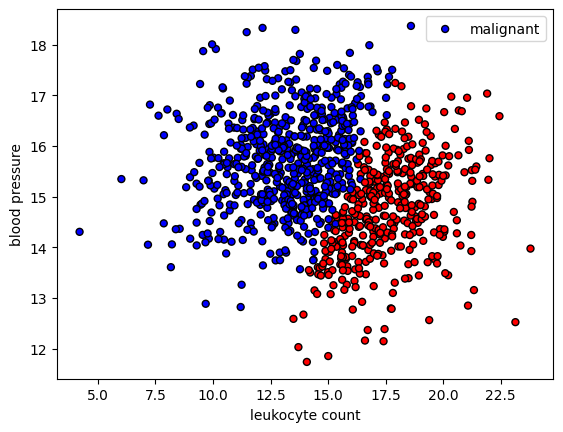

In [5]:
# Plot the data
colors = {"benign": "red", "malignant": "blue"}
plt.scatter(X[:, 0], X[:, 1], c=[colors[_y] for _y in y], s=25, edgecolors="k")
plt.xlabel("leukocyte count")
plt.ylabel("blood pressure")
plt.legend(["malignant", "benign"], loc="upper right")
plt.show()

In [6]:
# Split the Data
from sklearn.model_selection import train_test_split
import collections
TRAIN_SIZE = 0.7
VAL_SIZE = 0.15
TEST_SIZE = 0.15

In [7]:
def train_val_test_set(X, y, train_size):
    X_train, X_vt, y_train, y_vt = train_test_split(X, y, train_size=TRAIN_SIZE, stratify=y)
    X_val, X_test, y_val, y_test = train_test_split(X_vt, y_vt, train_size=0.5, stratify=y_vt)
    return X_train, X_val, X_test, y_train, y_val, y_test

In [8]:
# Split the Data
X_train, X_val, X_test, y_train, y_val, y_test = train_val_test_set(
    X=X, y=y, train_size=TRAIN_SIZE)
print (f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print (f"X_val: {X_val.shape}, y_val: {y_val.shape}")
print (f"X_test: {X_test.shape}, y_test: {y_test.shape}")
print (f"Sample point: {X_train[0]} → {y_train[0]}")

X_train: (700, 2), y_train: (700,)
X_val: (150, 2), y_val: (150,)
X_test: (150, 2), y_test: (150,)
Sample point: [14.50936702 15.89222413] → malignant


In [9]:
# Overall class distribution
class_counts = dict(collections.Counter(y))
print (f"Classes: {class_counts}")
print (f'm:b = {class_counts["malignant"]/class_counts["benign"]:.2f}')

Classes: {'malignant': 611, 'benign': 389}
m:b = 1.57


In [10]:
# Class counts and distributions for each split
train_class_counts = dict(collections.Counter(y_train))
val_class_counts = dict(collections.Counter(y_val))
test_class_counts = dict(collections.Counter(y_test))
print (f'train m:b = {train_class_counts["malignant"]/train_class_counts["benign"]:.2f}')
print (f'val m:b = {val_class_counts["malignant"]/val_class_counts["benign"]:.2f}')
print (f'test m:b = {test_class_counts["malignant"]/test_class_counts["benign"]:.2f}')

train m:b = 1.57
val m:b = 1.59
test m:b = 1.54


In [11]:
# Encoding the Target Variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_train

array([1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,

In [12]:
y_val = le.fit_transform(y_val)
y_test = le.fit_transform(y_test)

In [13]:
le.classes_

array(['benign', 'malignant'], dtype=object)

In [14]:
inv = le.inverse_transform(y_train)
inv[0]

'malignant'

In [15]:
# Class Weights
counts = np.bincount(y_train)
class_weights = {i:1.0/count for i, count in enumerate(counts)}
print(f"counts: {counts}\nweights: {class_weights}")

counts: [272 428]
weights: {0: 0.003676470588235294, 1: 0.002336448598130841}


In [16]:
# Standardizing the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaler = sc.fit(X_train)

In [17]:
# Fit the train test and validation data in standard scaler object
X_train = X_scaler.transform(X_train)
X_val = X_scaler.transform(X_val)
X_test = X_scaler.transform(X_test)

In [18]:
# Check the mean and variance
print (f"X_test[0]: mean: {np.mean(X_test[:, 0], axis=0):.1f}, std: {np.std(X_test[:, 0], axis=0):.1f}")
print (f"X_test[1]: mean: {np.mean(X_test[:, 1], axis=0):.1f}, std: {np.std(X_test[:, 1], axis=0):.1f}")

X_test[0]: mean: -0.2, std: 1.1
X_test[1]: mean: 0.1, std: 1.1


In [19]:
# Let us prepare the model using PyTorch
import torch
from torch import nn
import torch.nn.functional as F
seed = 22
torch.manual_seed(22)

In [20]:
class LogisticRegression(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(LogisticRegression, self).__init__()
        self.fc1 = nn.Linear(input_dim, num_classes)

    def forward(self, x_in):
        z = self.fc1(x_in)
        return z

In [21]:
INPUT_DIM = X_train.shape[1] # X is 2-dimensional
NUM_CLASSES = 2 # y has two possibilities (benign or malignant)
NUM_EPOCHS = 1000

In [22]:
# Let us initialize the model
model = LogisticRegression(input_dim=INPUT_DIM, num_classes=NUM_CLASSES)
print (model.named_parameters)

<bound method Module.named_parameters of LogisticRegression(
  (fc1): Linear(in_features=2, out_features=2, bias=True)
)>


In [23]:
# Let us compute the loss
loss_fn = nn.CrossEntropyLoss()
y_pred = torch.randn(3, NUM_CLASSES, requires_grad=False)
y_true = torch.empty(3, dtype=torch.long).random_(NUM_CLASSES)
print (y_true)
loss = loss_fn(y_pred, y_true)
print(f"Loss: {loss.numpy()}")

tensor([0, 1, 1])
Loss: 0.6660817265510559


In [24]:
# Define Loss
class_weights_tensor = torch.Tensor(list(class_weights.values()))
loss_fn = nn.CrossEntropyLoss(weight=class_weights_tensor)

In [25]:
# Let us compute the evaluation metrics
# Accuracy
def accuracy_fn(y_pred, y_true):
    n_correct = torch.eq(y_pred, y_true).sum().item()
    accuracy = (n_correct / len(y_pred)) * 100
    return accuracy

In [26]:
y_pred = torch.Tensor([0, 0, 1])
y_true = torch.Tensor([1, 1, 1])
print(f"Accuracy: {accuracy_fn(y_pred, y_true):.1f}")

Accuracy: 33.3


In [27]:
# Let us use an optimizer
from torch.optim import Adam
optimizer = Adam(model.parameters(), lr = 1e-1)

In [28]:
# Convert data to tensors
X_train = torch.Tensor(X_train)
y_train = torch.LongTensor(y_train)
X_val = torch.Tensor(X_val)
y_val = torch.LongTensor(y_val)
X_test = torch.Tensor(X_test)
y_test = torch.LongTensor(y_test)

In [29]:
# Training
for epoch in range(NUM_EPOCHS):
    # Forward pass
    y_pred = model(X_train)

    # Loss
    loss = loss_fn(y_pred, y_train)

    # Zero all gradients
    optimizer.zero_grad()

    # Backward pass
    loss.backward()

    # Update weights
    optimizer.step()

    if epoch%10==0:
        predictions = y_pred.max(dim=1)[1] # class
        accuracy = accuracy_fn(y_pred=predictions, y_true=y_train)
        print (f"Epoch: {epoch} | loss: {loss:.2f}, accuracy: {accuracy:.1f}")

Epoch: 0 | loss: 1.02, accuracy: 30.9
Epoch: 10 | loss: 0.23, accuracy: 98.0
Epoch: 20 | loss: 0.14, accuracy: 96.4
Epoch: 30 | loss: 0.11, accuracy: 97.0
Epoch: 40 | loss: 0.09, accuracy: 97.7
Epoch: 50 | loss: 0.08, accuracy: 98.0
Epoch: 60 | loss: 0.08, accuracy: 98.1
Epoch: 70 | loss: 0.07, accuracy: 98.4
Epoch: 80 | loss: 0.07, accuracy: 98.3
Epoch: 90 | loss: 0.07, accuracy: 98.4
Epoch: 100 | loss: 0.07, accuracy: 98.4
Epoch: 110 | loss: 0.06, accuracy: 98.4
Epoch: 120 | loss: 0.06, accuracy: 98.4
Epoch: 130 | loss: 0.06, accuracy: 98.4
Epoch: 140 | loss: 0.06, accuracy: 98.4
Epoch: 150 | loss: 0.06, accuracy: 98.4
Epoch: 160 | loss: 0.06, accuracy: 98.4
Epoch: 170 | loss: 0.05, accuracy: 98.4
Epoch: 180 | loss: 0.05, accuracy: 98.6
Epoch: 190 | loss: 0.05, accuracy: 98.6
Epoch: 200 | loss: 0.05, accuracy: 98.6
Epoch: 210 | loss: 0.05, accuracy: 98.6
Epoch: 220 | loss: 0.05, accuracy: 98.6
Epoch: 230 | loss: 0.05, accuracy: 98.6
Epoch: 240 | loss: 0.05, accuracy: 98.6
Epoch: 250 

In [31]:
# Model Evaluation
from sklearn.metrics import accuracy_score
# Predictions
pred_train = F.softmax(model(X_train), dim=1)
pred_test = F.softmax(model(X_test), dim=1)
print (f"sample probability: {pred_test[0]}")
pred_train = pred_train.max(dim=1)[1]
pred_test = pred_test.max(dim=1)[1]
print (f"sample class: {pred_test[0]}")

sample probability: tensor([7.3411e-19, 1.0000e+00], grad_fn=<SelectBackward0>)
sample class: 1


In [32]:
# Accuracy
train_acc = accuracy_score(y_train, pred_train)
test_acc = accuracy_score(y_test, pred_test)
print (f"train acc: {train_acc:.2f}, test acc: {test_acc:.2f}")

train acc: 0.99, test acc: 0.99


In [33]:
# Visualizing the train and test split classes
def plot_multiclass_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))
    cmap = plt.cm.Spectral

    X_test = torch.from_numpy(np.c_[xx.ravel(), yy.ravel()]).float()
    y_pred = F.softmax(model(X_test), dim=1)
    _, y_pred = y_pred.max(dim=1)
    y_pred = y_pred.reshape(xx.shape)
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

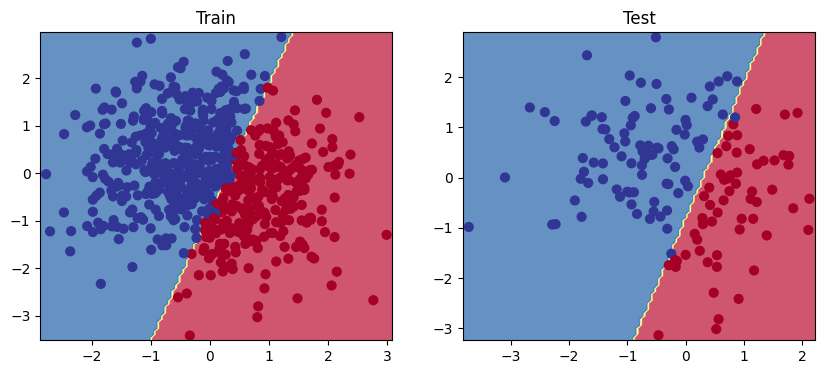

In [35]:
# Visualize the decision boundary
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_multiclass_decision_boundary(model=model, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_multiclass_decision_boundary(model=model, X=X_test, y=y_test)
plt.show()
